<a href="https://colab.research.google.com/github/icarob-eng/data-science-airlines/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os


# Caminho para a pasta onde estão os arquivos
data_dir = 'archive'

# Lista de anos que queremos carregar
anos = [2018, 2019, 2020, 2021, 2022]

# Dicionário para armazenar os DataFrames
dados_voos = {}

for ano in anos:
    csv_path = os.path.join(data_dir, f'Combined_Flights_{ano}.csv')
    parquet_path = os.path.join(data_dir, f'Combined_Flights_{ano}.parquet')

    if os.path.exists(csv_path):
        print(f"Lendo CSV para o ano {ano}")
        dados_voos[ano] = pd.read_csv(csv_path)
    elif os.path.exists(parquet_path):
        print(f"Lendo Parquet para o ano {ano}")
        dados_voos[ano] = pd.read_parquet(parquet_path)
    else:
        print(f"Dados para o ano {ano} não encontrados.")

# Carregando também o arquivo de companhias aéreas
airlines_path = os.path.join(data_dir, 'Airlines.csv')
if os.path.exists(airlines_path):
    airlines_df = pd.read_csv(airlines_path)
    print("Arquivo Airlines.csv carregado com sucesso.")
else:
    airlines_df = None
    print("Arquivo Airlines.csv não encontrado.")

# Exemplo de visualização
dados_voos[2022].head()
# print(airlines_df.head())


Dados para o ano 2018 não encontrados.
Dados para o ano 2019 não encontrados.
Dados para o ano 2020 não encontrados.
Dados para o ano 2021 não encontrados.
Lendo CSV para o ano 2022
Arquivo Airlines.csv não encontrado.


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245.0,-17.0,0.0,-2.0,1200-1259,1.0,0.0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849.0,-1.0,0.0,-1.0,0800-0859,2.0,0.0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639.0,-3.0,0.0,-1.0,1600-1659,2.0,0.0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605.0,-18.0,0.0,-2.0,1600-1659,2.0,0.0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245.0,6.0,0.0,0.0,1200-1259,2.0,0.0


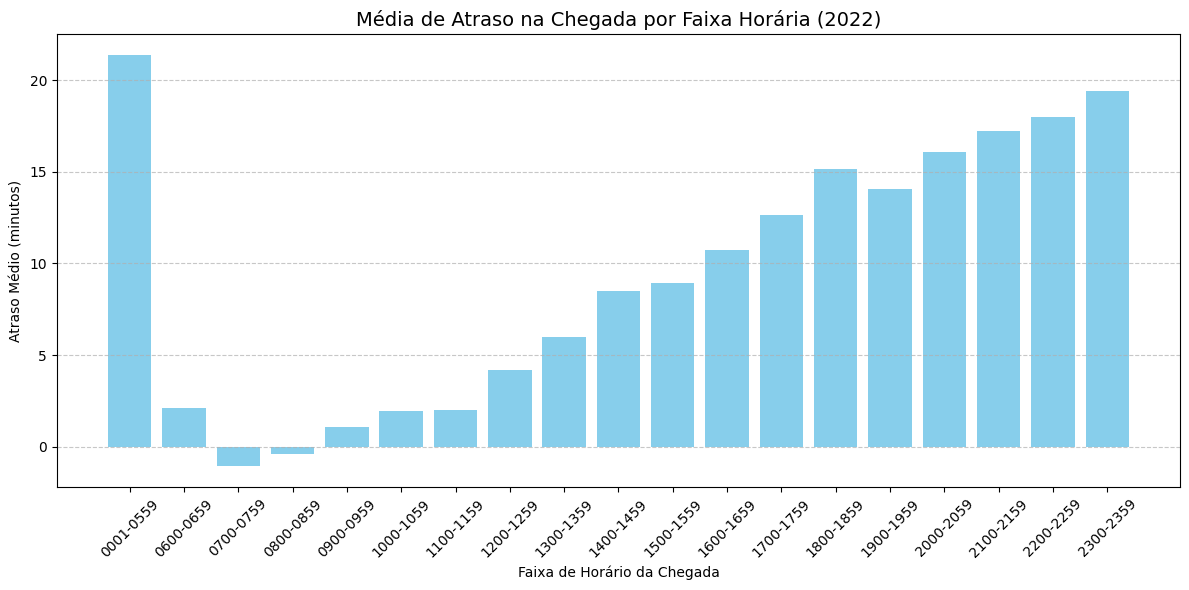

In [ ]:
### Relação entre os atrasos médios e o horário do atraso de voos no ano de 2022 ###

# Filtra o dataframe de 2022
df_2022 = dados_voos[2022]

# Agrupa os dados e calcula a média de atraso na chegada por faixa horária
media_atraso_por_hora = (
    df_2022.groupby('ArrTimeBlk')['ArrDelay']
    .mean()
    .reset_index()
    .sort_values('ArrTimeBlk')
)

x = media_atraso_por_hora['ArrTimeBlk']
y = media_atraso_por_hora['ArrDelay']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

plt.title('Média de Atraso na Chegada por Faixa Horária (2022)', fontsize=14)
plt.xlabel('Faixa de Horário da Chegada')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


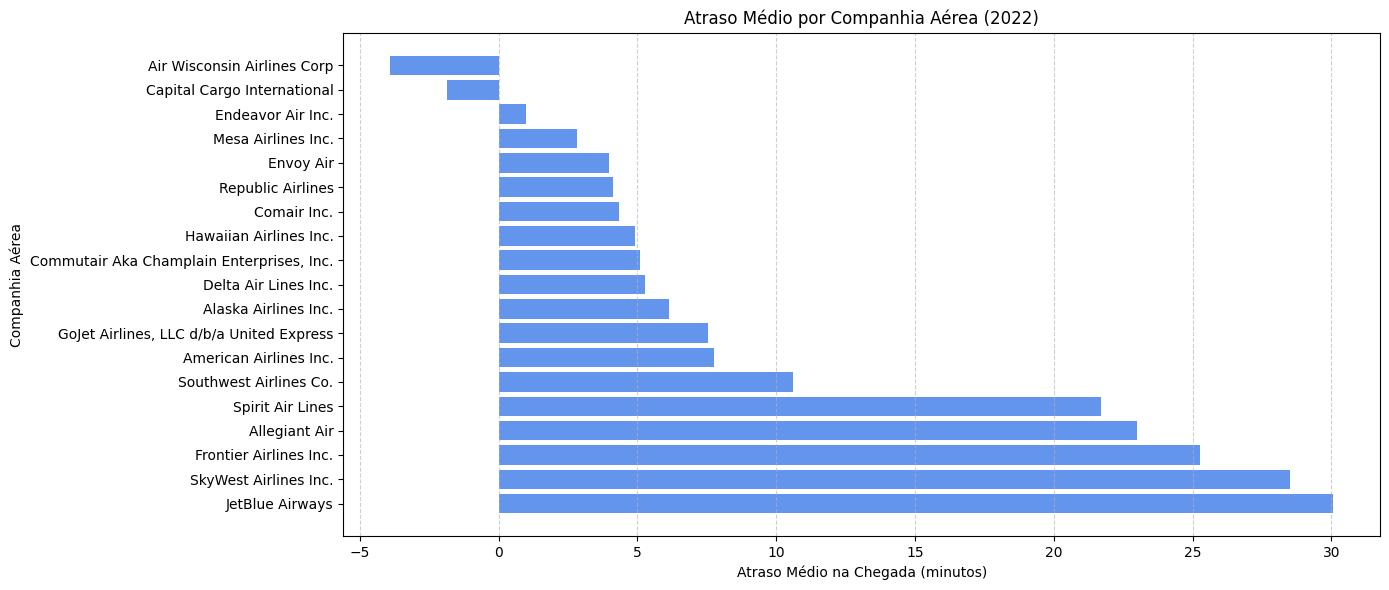

In [ ]:
import matplotlib.pyplot as plt

df_2022 = dados_voos[2022]

# Agrupa por companhia aérea e calcula a média de atraso na chegada
media_atraso_por_companhia = (
    df_2022.groupby('Airline')['ArrDelay']
    .mean()
    .reset_index()
    .sort_values('ArrDelay', ascending=False)
)

x = media_atraso_por_companhia['Airline']
y = media_atraso_por_companhia['ArrDelay']

plt.figure(figsize=(14, 6))
plt.barh(x, y, color='cornflowerblue')
plt.xlabel('Atraso Médio na Chegada (minutos)')
plt.ylabel('Companhia Aérea')
plt.title('Atraso Médio por Companhia Aérea (2022)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


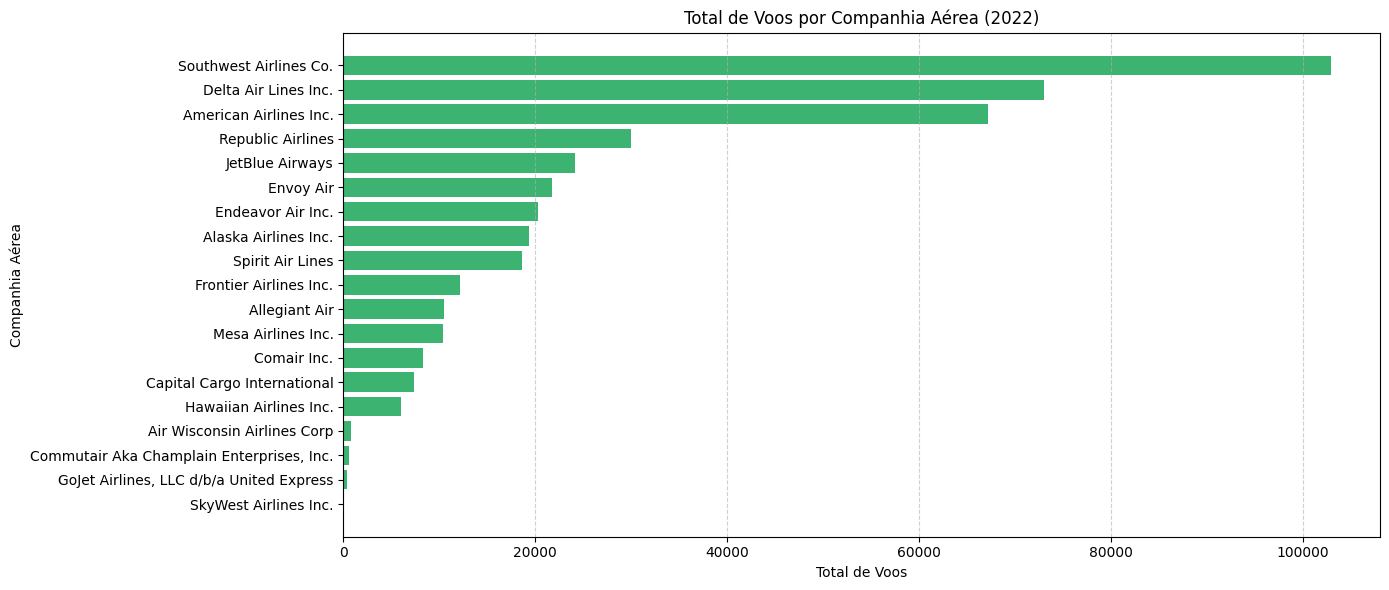

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que os nomes das colunas estejam limpos
df_2022 = dados_voos[2022]
df_2022.columns = df_2022.columns.str.strip()

voos_por_companhia_series = df_2022['Airline'].value_counts()
voos_por_companhia = voos_por_companhia_series.reset_index()

voos_por_companhia = voos_por_companhia.rename(columns={'count': 'TotalVoos'})


x = voos_por_companhia['Airline']
y = voos_por_companhia['TotalVoos']

plt.figure(figsize=(14, 6))
plt.barh(x, y, color='mediumseagreen')
plt.xlabel('Total de Voos')
plt.ylabel('Companhia Aérea')
plt.title('Total de Voos por Companhia Aérea (2022)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Total de companhias aéreas únicas: 19


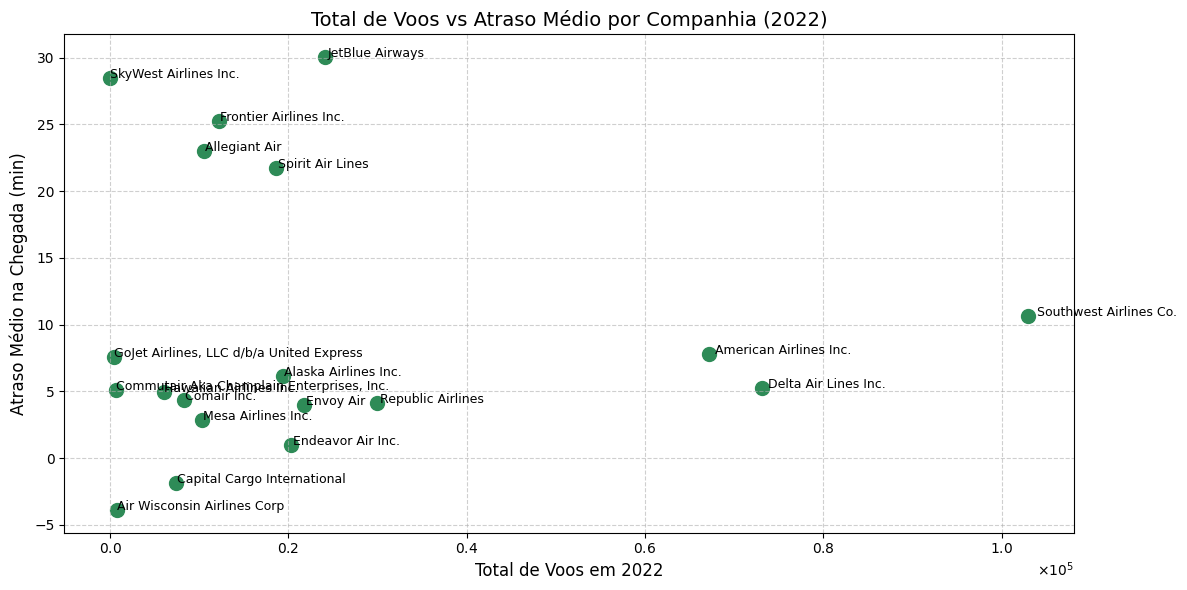

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

# Limpar colunas
df_2022 = dados_voos[2022]
df_2022.columns = df_2022.columns.str.strip()

# Agrupar por companhia aérea
agrupado = df_2022.groupby('Airline').agg({
    'ArrDelay': 'mean',
    'FlightDate': 'count'  # número de voos (poderia usar qualquer coluna não nula)
}).reset_index()

num_companhias = df_2022['Airline'].nunique()
print(f"Total de companhias aéreas únicas: {num_companhias}")

agrupado = agrupado.rename(columns={
    'ArrDelay': 'AtrasoMedio',
    'FlightDate': 'TotalVoos'
})

plt.figure(figsize=(12, 6))
plt.scatter(agrupado['TotalVoos'], agrupado['AtrasoMedio'], color='seagreen', s=100)

for i in range(len(agrupado)):
    plt.text(agrupado['TotalVoos'][i]*1.01, agrupado['AtrasoMedio'][i],
             agrupado['Airline'][i], fontsize=9)

# Aplicar notação científica no eixo x
plt.gca().xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel('Total de Voos em 2022', fontsize=12)
plt.ylabel('Atraso Médio na Chegada (min)', fontsize=12)
plt.title('Total de Voos vs Atraso Médio por Companhia (2022)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

